# 2. SUSCEPTIBILITY TO AERODYNAMIC EXCITATION

This section shall be used to determine the susceptibility of a bridge to aerodynamic excitation. If the structure is found to be susceptible to aerodynamic excitation then the additional requirements of 3 shall be followed.

## 2.1 Criteria for applicability and consideration of aerodynamic effects
The aerodynamic susceptibility parameter, Pb, shall be derived in order to categorise the structure using the equation:

In [1]:
from sympy import symbols, Eq, Function,UnevaluatedExpr, Mul
from sympy import *
import Aerodynamic_Excitation as AF

In [2]:
AF.P_func()

In [3]:
# Define a function to round an expression
def round_expr(expr, num_digits=3):
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(Number)})

#Define a funtion to round an equation
def round_equation(eq, num_digits=3):
    lhs = eq.lhs
    rhs = eq.rhs
    rounded_rhs = round_expr(rhs, num_digits)
    return Eq(lhs, rounded_rhs)


In [4]:

# Define the symbols
b = symbols('b')
m = symbols('m')
rho = symbols('rho')
V_r = symbols('V_r')
L = symbols('L')
f_B = symbols('f_B')

P = symbols('P', cls=Function)(b)

# Define the equation P(b):

def P_func(b=b,rho=rho, m=m, V_r=V_r,L=L,f_B=f_B):
    # Make x an UnevaluatedExpr
    b=UnevaluatedExpr(b)
    rho=UnevaluatedExpr(rho)
    m=UnevaluatedExpr(m)  
    V_r=UnevaluatedExpr(V_r)
    L=UnevaluatedExpr(L)
    f_B=UnevaluatedExpr(f_B)    
    

    #return Eq(P, ((rho * b**2 / m)) * (16 * V_r**2 / (b * L * f_b**2)))
    return Eq(P,Mul(  ((rho * b**2) / m) , (16 * V_r**2) / (b * L * f_B**2),evaluate=False))


# Display the equation
display(P_func())
display(P_func(b=12.6,rho=1.2256,m=6306,V_r=20,L=96.673,f_B=1.17))
P_b_round=round_equation(P_func(b=12.6,rho=1.2256,m=6306,V_r=20,L=96.673,f_B=1.17).doit())
display(P_b_round)


where

$\rho \quad$ is the density of air (see NOTE 1);

$b \quad$ is the overall width of the bridge deck (see
Figure 1);

$m \quad$ is the mass per unit length of the bridge (see NOTE 1);

$V_r \quad$ is the hourly mean wind speed (for relieving areas) as per BD 37 (DMRB 1.3);

$L \quad$ is the length of the relevant maximum span of the bridge;

$f_B \quad$ is the natural frequency in bending (see NOTE 2).


### 2.1.1 Limited amplitude response - vortex excitation

#### 2.1.1.1 General

Estimates of the critical wind speed for vortex excitation for both bending and torsion (Vcr) shall be derived according to 2.1.1.2. For certain truss girder bridges see 2.1.1.3(c). The limiting criteria given in 2.1.1.3 shall then be satisfied.

#### 2.1.1.2 Criticalwindspeedsforvortex excitation




In [5]:
# Calculate V_cr

# define the bridge types:
bridge_types = ["1", "1A", "3", "3A", "4", "4A", "2", "5", "6"]

# define the symbols
V_cr = symbols('V_cr')
f_T=symbols('f_T')
b_0=symbols('b_0')
d_4=symbols('d_4')
f=symbols('f')
r=symbols('r')
bt=symbols('bt')


def V_cr_func(bridge_type, b_0=b_0, d_4=d_4, f=f):
    r = b_0/d_4

    if r <= 5 and bridgetype in bridge_types :
        val = 6.5 * f * d_4
    elif r > 5 and r < 10:
        if bridge_type in ["1", "1A", "3", "3A", "4", "4A"]:
            val = f * d_4 * (1.1 * b_0 / d_4 + 1)
        elif bridge_type in ["2", "5", "6"]:
            val = f * d_4 * (0.7 * b_0 / d_4 + 3)
    elif r >= 10:
        if bridge_type in ["1", "1A", "3", "3A", "4", "4A"]:
            val = 12 * f * d_4
        elif bridge_type in ["2", "5", "6"]:
            val = 10 * f * d_4

    return Eq(V_cr, val)

In [6]:
from sympy import symbols, Piecewise, Eq

# Define the bridge types:
bridge_types = ["1", "1A", "3", "3A", "4", "4A", "2", "5", "6"]

# Define the symbols
V_cr = symbols('V_cr')
f_T = symbols('f_T')
b_0 = symbols('b_0')
d_4 = symbols('d_4')
f = symbols('f')
r = symbols('r')
bt = symbols('bt')

def V_cr_func(bridge_type, b_0=b_0, d_4=d_4, f=f):
    r = b_0 / d_4

    val = Piecewise(
        (6.5 * f * d_4, (r <= 5) & (bridge_type in bridge_types)),
        (f * d_4 * (1.1 * b_0 / d_4 + 1), (r > 5) & (r < 10) & (bridge_type in ["1", "1A", "3", "3A", "4", "4A"])),
        (f * d_4 * (0.7 * b_0 / d_4 + 3), (r > 5) & (r < 10) & (bridge_type in ["2", "5", "6"])),
        (12 * f * d_4, (r >= 10) & (bridge_type in ["1", "1A", "3", "3A", "4", "4A"])),
        (10 * f * d_4, (r >= 10) & (bridge_type in ["2", "5", "6"])),
        (0, True)  # default value when none of the conditions are met
    )

    return Eq(V_cr, val)


In [7]:
display(round_equation(V_cr_func(bridge_type="1A", b_0=12.6, d_4=3.8,f=1.17)))

In [8]:
display(Eq(V_cr,V_cr_func(bridge_type="1A", b_0=12.6, d_4=3.8,f=1.17).rhs.round(3)))

#### 2.1.1.3 Limiting criteria


In [9]:
# define the symbols 
V_vs= symbols('V_vs')
def V_vs_func(V_r=V_r):
    val=1.25*V_r
    return Eq(V_vs, val, evaluate=False)

display(V_vs_func())



### 2.1.2 Limited amplitude response - turbulence

In [10]:

# Define the symbols
V_s = symbols('V_s')
sigma_flm=symbols('sigma_flm')
sigma_c=symbols('sigma_c')
P_T = symbols('P_T', cls=Function)(b)

# Define the equation

def P_T_func(b=b,rho=rho, m=m, V_s=V_s,f_B=f_B, sigma_flm=sigma_flm, sigma_c=sigma_c):
    # Make x an UnevaluatedExpr
    b=UnevaluatedExpr(b)
    rho=UnevaluatedExpr(rho)
    m=UnevaluatedExpr(m)  
    V_s=UnevaluatedExpr(V_s)
    sigma_flm=UnevaluatedExpr(sigma_flm)
    sigma_c=UnevaluatedExpr(sigma_c)    
    

    return Eq(P_T,Mul( Mul(((rho * b**2) / m) , (V_s / (f_B*b))**2, evaluate=False),((sigma_flm*b)/sigma_c),evaluate=False))


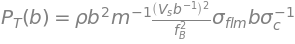

In [11]:
display(P_T_func())

$V_s$ is the site hourly mean wind speed ($10m$ above ground level) as per BD 37 (DMRB 1.3);

$\sigma_{flm}$ is the peak stress in the structure per unit deflection in the first mode of vibration, derived for the most highly stressed location in the relevant element:

$\sigma_c$ is a reference stress as follows:

for steel beam elements, $\sigma_c = 600 N/mm2$ for the
c longitudinal flange bending stress; or
for truss bridges, $\sigma_c = 750 N/mm2$ for the chord
axial stress; or for concrete elements (composite or concretebridges), $\sigma_c = 80 N/mm2$ for the primary bending 
concrete stress; or for cable-stayed bridges the peak stay axial stress should additionally be examined, with $\sigma_c = 1200 N/mm2$.

#### 2.1.3.2 Galloping and stall flutter

**(a) Vertical motion**

Vertical motion need be considered only for bridges of types 3, 3A, 4 and 4A as shown in Figure 1, and only if $b < 4d_4$.

**(b) Torsional motion**

In [30]:
V_Rg=symbols("V_Rg")
V_g=symbols("V_g")

def V_g_func_0(bridge_type,motion, V_Rg=V_Rg, f_B=f_B, f_T=f_T,b=b, d_4=d_4):
    
    V_Rg=UnevaluatedExpr(V_Rg)
    f_B=UnevaluatedExpr(f_B)
    f_T=UnevaluatedExpr(f_T)
    b=UnevaluatedExpr(b)
    d_4=UnevaluatedExpr(d_4)
    if bridge_type in ["1","1A","2","5","6"]:
        if motion=="Torsional":
            val=3.3*f_T
        if motion=="Vertical":
            val=float("nan")
    else:
        if motion=="Vertical":
            
            val=V_Rg * f_B * d_4
        else:
            val3=Min(5.5*f_T*b, 12*f_T*d_4)
            val4=5.5*f_T*b
            
            cond3=(b<4*d_4)
            cond4=(b>=4*d_4)
            
            val=Piecewise((val3,cond3), (val4, cond4))
    
    return Eq(V_g,val, evaluate=False)



In [31]:
display(V_g_func_0(bridge_type="3",motion="Vertical"))

In [32]:
def V_g_func(bridge_type, motion, b=b, b_0=b_0, m=m, rho=rho, d_4=d_4, f_B=f_B, f_T=f_T, delta_s=delta_s):
   # b=UnevaluatedExpr(b)
    #b_0=UnevaluatedExpr(b_0)
   # m=UnevaluatedExpr(m)
   # rho=UnevaluatedExpr(rho)
   # d_4=UnevaluatedExpr(d_4)
    #f_B=UnevaluatedExpr(f_B)
   # f_T=UnevaluatedExpr(f_T)
   # delta_s=UnevaluatedExpr(delta_s)

    b = float(b)
    b_0 = float(b_0)

    if bridge_type in ["1", "1A", "2", "5", "6"]:
        if motion == "Torsional":
            val = 3.3 * f_T
        if motion == "Vertical":
            val = float("nan")
    if bridge_type in ["3", "3A", "4", "4A"]:
        if motion == "Vertical":
            C_g=C_g_func(bridge_type, b=b, b_0=b_0, d_4=d_4)
            V_Rg=V_Rg_func(C_g=C_g, m=m, delta_s=delta_s, rho=rho, d_4=d_4)
            val=V_Rg * f_B * d_4

        if motion == "Torsional":
            overhang = (b - b_0) / 2
            val1 = 2.0
            val2 = 1.0
            cond1 = (bridge_type in ["3", "4"]) & (overhang >= 0.7 * d_4)
            cond2 = (overhang < 0.7 * d_4)
            C_g = Piecewise((val1, cond1), (val2, cond2), (float('nan'), True))
            
            if C_g is not None:
                V_Rg = C_g * (m * delta_s) / rho * d_4**2
                val = V_Rg * f_B * d_4
            else:
                val = float('nan')
        else:
            val3 = Min(5.5 * f_T * b, 12 * f_T * d_4)
            val4 = 5.5 * f_T * b
            
            cond3 = (b < 4 * d_4)
            cond4 = (b >= 4 * d_4)
            
            val = Piecewise((val3, cond3), (val4, cond4))

    return Eq(V_g, val, evaluate=False)


In [39]:
display(V_g_func(bridge_type="3A",motion="Torsional"))

      ⎧Min(5.5*f_T*b, 12*f_T*d_4)  for b < 4⋅d₄
V_g = ⎨                                        
      ⎩        5.5⋅f_T⋅b            otherwise  

In [ ]:


C_g=symbols('C_g')

def C_g_func(bridge_type, b=b, b_0=b_0, d_4=d_4):
    overhang = (b - b_0) / 2
    b_0 = UnevaluatedExpr(b_0)
    b = UnevaluatedExpr(b)
    d_4 = UnevaluatedExpr(d_4)
    val = Piecewise((2.0, (bridge_type in ["3", "4"]) & (overhang >= 0.7 * d_4)),
                   (1.0, (bridge_type in ["3", "3A", "4", "4A"]) & (overhang < 0.7 * d_4)),
                   (float('nan'), True))
    return val#Eq(C_g, val, evaluate=False)

c=C_g_func(bridge_type="3", b=12.6, b_0=6.3, d_4=3.8).doit()
c

In [ ]:
V_g, V_Rg, f_B, f_T, b, d_4 , delta_s,rho,b_0 = symbols('V_g V_Rg f_B f_T b d_4 delta_s rho b_0')

def V_Rg_func(C_g=C_g, m=m, delta_s=delta_s, rho=rho, d_4=d_4):
    C_g = UnevaluatedExpr(C_g)
    delta_s = UnevaluatedExpr(delta_s)
    rho=UnevaluatedExpr(rho)
    d_4 = UnevaluatedExpr(d_4)
    result = C_g*(m*delta_s)/rho*d_4**2

    return result#Eq(V_Rg, result, evaluate=False)

In [ ]:
rg=V_Rg_func(C_g=c, m=6306, delta_s=0.5, rho=1.226, d_4=3.8).doit()
display(Eq(V_Rg,round_expr(rg)))

In [ ]:
def V_g_func(bridge_type, motion, b=b, b_0=b_0, m=m, rho=rho, d_4=d_4, f_B=f_B, f_T=f_T, delta_s=delta_s):

    b = float(b)
    b_0 = float(b_0)

    if bridge_type in ["1", "1A", "2", "5", "6"]:
        if motion == "Torsional":
            val = 3.3 * f_T
        if motion == "Vertical":
            val = float("nan")
    else:
        if motion == "Vertical":
            overhang = (b - b_0) / 2
            val1 = 2.0
            val2 = 1.0
            cond1 = (bridge_type in ["3", "4"]) & (overhang >= 0.7 * d_4)
            cond2 = (overhang < 0.7 * d_4)
            C_g = Piecewise((val1, cond1), (val2, cond2), (float('nan'), True))
            
            if C_g is not None:
                V_Rg = C_g * (m * delta_s) / rho * d_4**2
                val = V_Rg * f_B * d_4
            else:
                val = float('nan')
        else:
            val3 = Min(5.5 * f_T * b, 12 * f_T * d_4)
            val4 = 5.5 * f_T * b
            
            cond3 = (b < 4 * d_4)
            cond4 = (b >= 4 * d_4)
            
            val = Piecewise((val3, cond3), (val4, cond4))

    return Eq(V_g, val, evaluate=False)

In [ ]:
V_g=V_g_func(bridge_type="3",motion="Vertical",b=12.6, b_0=6.3,m=6306,rho=1.226, d_4=3.8, f_B=1.17, f_T=1.3, delta_s=0.5)
display(round_equation(V_g))

where

$f_B, m$ and $\rho$ are as defined in 2.1;

$C_g$ is $2.0$ for bridges of type 3 and 4 with side overhang greater than $0.7d_4$ or $1.0$ for bridges of type 3, 3A, 4 and 4A with side overhang less than or equal to $0.7d_4$;

$\delta_s$ is the logarithmic decrement of damping, as specified in 3.1.2,

$d_4$ is the reference depth of the bridge shown in Figure 1, as defined in 2.1.1.2.

Alternatively, wind tunnel tests shall be undertaken to determine the value of $V_g$.


#### 2.1.3.3 Classical flutter
The critical wind speed for classical flutter, $V_f$, shall be calculated from the reduced critical wind speed:


In [ ]:
# define the symbols:

V_Rf =symbols('V_Rf')
V_f=symbols('V_f')
r=symbols('r')



def V_f_func(V_Rf=V_Rf,f_T=f_T,b=b):
    V_Rf=UnevaluatedExpr(V_Rf)
    val=V_Rf*f_T*b
    return Eq(V_f,val)

display(V_f_func())


def V_Rf_func(f_B=f_B, f_T=f_T, m=m, r=r, rho=rho,b=b):
    f_B=UnevaluatedExpr(f_B)
    f_T=UnevaluatedExpr(f_T)
    f_B=UnevaluatedExpr(f_B)
    m=UnevaluatedExpr(m)
    r=UnevaluatedExpr(r)
    rho=UnevaluatedExpr(rho)
    b=UnevaluatedExpr(b)
    
    a1=(1-1.1*(f_B/f_T)**2)#**(1/2)
    a2=Pow(a1,(1/2), evaluate=False)
    val=1.8*a2*((m*r)/(rho*b**3))**(1/2)
   
    return Eq(V_Rf,val)
    
display(V_Rf_func())
print(f'\nSubstituting V_Rf in to V_f:')
display(V_f_func(V_Rf=V_Rf_func().rhs))

$r$ is the polar radius of gyration of the effective bridge cross section at the centre of the main span (polar second moment of mass/mass)1⁄2.

In [ ]:
I_x=symbols('I_x')
I_y=symbols('I_y')
A=symbols('A') # A

def r_func(I_x=I_x,I_y=I_y,A=A):
    I_z=I_x+I_y
    val=(I_z/A)
    return Eq(r, val)

display(r_func())

#### 2.1.3.4 Limiting criteria

In [ ]:

# define the symbols
V_WO= symbols('V_WO')
V_d=symbols('V_d')
K_1A=symbols('K_1A')

def V_WO_func(V_r=V_r, V_d=V_d, K_1A=K_1A):
    V_r=UnevaluatedExpr(V_r)
    V_d=UnevaluatedExpr(V_d)
    K_1A=UnevaluatedExpr(K_1A)
    
    val= round_expr((1.1/3)*(V_r+2*V_d)*K_1A,2)
    return Eq(V_WO,round_expr(val),evaluate=False)


In [ ]:
display(V_WO_func())

In [ ]:
# define the symbols
c=symbols("c")
r=symbols("r")
y_max=symbols("y_max")

def y_max_func_0(bridge_type, motion,c=c, b=b, d_4=d_4,rho=rho,m=m,delta_s=delta_s,r=r):
    bridge_types = ["1", "1A", "2", "3", "3A", "4", "4A", "5", "6"]
    c=UnevaluatedExpr(c)
    b=UnevaluatedExpr(b)
    d_4=UnevaluatedExpr(d_4)
    rho=UnevaluatedExpr(rho)
    m=UnevaluatedExpr(m)
    delta_s=UnevaluatedExpr(delta_s)
    r=UnevaluatedExpr(r)
    
    #calculate c:
    k, h, phi=symbols('k h phi')
    
    def c_func(k=k, h=h, phi=phi,d_4=d_4):
        k=UnevaluatedExpr(k)
        h=UnevaluatedExpr(h)
        phi=UnevaluatedExpr(phi)   
        val_c=3*(k+h*phi)/d_4
        
        return  val_c
    
    
    
    val1=(c*b**0.5*d_4**2.5*rho)/(4*m*delta_s)
    val2=(c*b**1.5*d_4**3.5*rho)/(8*m*r**2*delta_s)
    val3=str("Ignored")
    
    cond1=(bridge_type in bridge_types) & (motion=="Vertical")
    cond2=(bridge_type in ["1", "1A","3","3A","4","4A"]) & (motion=="Torsional")
    cond3=(bridge_type in ["2","5","6"]) & (motion=="Torsional")
    
    if c == symbols('c'):
    
        if cond1:
            val=val1
        if cond2:
            val=val2
        if cond3:
            val=val3
    if c==c_func():
        
        val="hello"
        
        
        
    return Eq(y_max,val, evaluate=False)
    
    



In [ ]:
display(y_max_func_0(bridge_type="1", motion="Torsional"))

In [ ]:
# Define the symbols
c = symbols("c")
r = symbols("r")
y_max = symbols("y_max")
k, h, phi = symbols('k h phi')

def c_func(k=k, h=h, phi=phi, d_4=d_4):
    return 3 * (k + h * phi) / d_4

def y_max_func_0(bridge_type, motion, c=c, b=b, d_4=d_4, rho=rho, m=m, delta_s=delta_s, r=r):
    bridge_types = ["1", "1A", "2", "3", "3A", "4", "4A", "5", "6"]
    

    val1 = (c * b**0.5 * d_4**2.5 * rho) / (4 * m * delta_s)
    text1=str("For vertical flexural vibrations and for bridge types 1 to 6")
    val2 = (c * b**1.5 * d_4**3.5 * rho) / (8 * m * r**2 * delta_s)
    val3 = str("y_max may be ignored for torsional vibrations for bridge types 2, 5 and 6")
    
    cond1 = (bridge_type in bridge_types) and (motion == "Vertical")
    cond2 = (bridge_type in ["1", "1A", "3", "3A", "4", "4A"]) and (motion == "Torsional")
    cond3 = (bridge_type in ["2", "5", "6"]) and (motion == "Torsional")
    
    
      # Calculate c based on the provided values or the function c_func if c is a symbol
    if c == symbols('c'):
        #k, h, phi = symbols('k h phi')
        #c = c_func(k, h, phi, d_4)
        if cond1:
            print(text1)
            val = val1
        elif cond2:
            print(text1)
            val = val2
        elif cond3:
            return val3
        return Eq(y_max, val, evaluate=False)
        
    if c is not symbols('c'):
        
        c = c_func(k, h, phi, d_4)
        if cond1:
            print(text1)
            val = val1
        elif cond2:
            print(text1)
            val = val2
        elif cond3:
            return val3
        return Eq(y_max, val)
        

        
  

In [ ]:
y_max_func_0(bridge_type="1", motion="Torsional")#)#, c=c_func()

In [ ]:
y_max_func_0(bridge_type="2", motion="Vertical")#, c=c_func()

In [ ]:

# Define the symbols
c = symbols("c")
r = symbols("r")
y_max = symbols("y_max")
k, h, phi, d_4 = symbols('k h phi d_4')

def c_func(k=k, h=h, phi=phi, d_4=d_4):
    return 3 * (k + h * phi) / d_4

def y_max_func(bridge_type, motion, c=c, b=b, d_4=d_4, rho=rho, m=m, delta_s=delta_s, r=r):
    bridge_types = ["1", "1A", "2", "3", "3A", "4", "4A", "5", "6"]
    

    val1 = (c * b**0.5 * d_4**2.5 * rho) / (4 * m * delta_s)
    val2 = (c * b**1.5 * d_4**3.5 * rho) / (8 * m * r**2 * delta_s)
    text3 = str("y_max may be ignored for torsional vibrations for bridge types 2, 5 and 6")
    
    text1=str("For vertical flexural vibrations and for bridge types 1 to 6")
    cond1 = (bridge_type in bridge_types) and (motion == "Vertical")
    text2=str("For torsional vibrations and for bridge types 1, 1A, 3, 3A, 4 and 4A")
    cond2 = (bridge_type in ["1", "1A", "3", "3A", "4", "4A"]) and (motion == "Torsional")
    cond3 = (bridge_type in ["2", "5", "6"]) and (motion == "Torsional")
    
    
      # Calculate c based on the provided values or the function c_func if c is a symbol
    if c == symbols('c'):
        #k, h, phi = symbols('k h phi')
        #c = c_func(k, h, phi, d_4)
        if cond1:
            text=text1
            val = val1
        elif cond2:
            text=text2
            val = val2
        elif cond3:
            return(text3)
        return Eq(y_max, val, evaluate=False)
        
    if c is not symbols('c'):
        
        c = c_func(k, h, phi, d_4)
        if cond1:
            text=text1
            val = val1
        elif cond2:
            text=text2
            val = val2
        elif cond3:
            return(text3)
        return text, Eq(y_max, val)


In [ ]:
y_max_func(bridge_type="2", motion="Vertical")